# Comparison of Features extracted via Matrices to those extracted via Neo4j

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Degree Comparisons

In [2]:
orig_deg = pd.read_table('../../learn-orig/prediction/features/features.tsv.bz2')
orig_deg = orig_deg[['compound_id', 'disease_id'] + [c for c in orig_deg.columns if c.startswith('degree_')]]
orig_deg.head(2)

/opt/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,compound_id,disease_id,degree_CbG,degree_CcSE,degree_CdG,degree_CiPC,degree_CpD,degree_CrC,degree_CtD,degree_CuG,degree_DaG,degree_DdG,degree_DlA,degree_DpC,degree_DpS,degree_DrD,degree_DtC,degree_DuG
0,DB01048,DOID:10652,3,136,0,2,0,2,1,0,196,250,20,5,44,3,4,250
1,DB05812,DOID:10652,8,71,0,0,0,1,1,0,196,250,20,5,44,3,4,250


In [3]:
mat_degs = pd.read_table('degree-features.tsv.bz2')

In [4]:
degs = pd.merge(orig_deg, mat_degs, on=['compound_id', 'disease_id'])

In [5]:
def compare_degrees(feature):
    old_feature = 'degree_' + feature
    return (degs[old_feature] - degs[feature]).sum()

In [6]:
print('Feature','\t', 'Num Different')

for feature in mat_degs.columns:
    if feature != 'compound_id' and feature != 'disease_id':
        print(feature, '\t\t', compare_degrees(feature))

Feature 	 Num Different
CbG 		 0
CcSE 		 0
CdG 		 0
CiPC 		 952
CpD 		 0
CrC 		 0
CtD 		 0
CuG 		 0
DaG 		 0
DdG 		 0
DlA 		 0
DpC 		 0
DpS 		 0
DrD 		 0
DtC 		 0
DuG 		 0


There shouldn't be any difference between these, so let's look at exactly how many and which compounds are showing a difference in degree features for Pharmacologic Class

In [7]:
diff = degs.query('CiPC != degree_CiPC')[['compound_id', 'disease_id', 'CiPC', 'degree_CiPC']]
len(set(diff['compound_id']))

5

In [8]:
diff.drop_duplicates(subset='compound_id')

,compound_id,disease_id,CiPC,degree_CiPC
917,DB00244,DOID:10652,1,4
1009,DB01183,DOID:10652,1,2
1053,DB00368,DOID:10652,2,3
1066,DB00338,DOID:10652,1,2
1195,DB00860,DOID:10652,1,2


Spot checking the first compound (DB00244) in the included .csv, I found it to have only 1 `includes_PCiC` edge. Therefore, the .csv I have may be a subtly different version of the network than that used for the computations in the original [learn]('https://github.com/dhimmel/learn') pipline.

# DWPC Comparisons

There are some metapaths that we know we cannot produce the exact same results.  However, lets see how many we can get exact, what the charactersitic of the paths are where we can't get them, and how different the results are.

In [9]:
orig_dwpc = pd.read_table('../../learn-orig/all-features/data/matrix/features.tsv.bz2')
orig_dwpc.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,rephetio-v2.0_perm-5,DB00014,DOID:0060073,0,1,lymphatic system cancer,Goserelin,0.022675,2,249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028591,0.004754,0.0,0.0


In [10]:
orig_dwpc = orig_dwpc.loc[orig_dwpc['hetnet'] == 'rephetio-v2.0']
orig_dwpc.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
1,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.028591,0.004754,0.0,0.0
13,rephetio-v2.0,DB00206,DOID:0060073,0,1,lymphatic system cancer,Reserpine,0.011069,8,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003003,0.001488,0.0,0.0


In [11]:
mat_dwpc = pd.read_table('dwpc-features.tsv.bz2')
mat_dwpc.head(2)

,compound_id,disease_id,CtDaGdCpD,CbGdDrDrD,CbG<rGiGdD,CdGeAdGaD,CpDdGuD,CbGcGaD,CtDdGuD,CrCbGaD,...,CtDaGiGdD,CdGdDtCtD,CpDuG<rGaD,CrCtDpSpD,CpDlAuGdD,CpDrDaGaD,CdGpCCpGaD,CdGr>GuAlD,CdGiGdAlD,CuGdCuGaD
0,DB00014,DOID:0050156,0.005948,0.0,0.0,0.0,0.0,0.0,0.01371,0.0,...,0.03161,0.0,0.0,0.000653,0.0,0.0,0.0,0.0,0.0,0.0
1,DB00014,DOID:0050425,0.002961,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
m = pd.merge(orig_dwpc, mat_dwpc, how='left', on=['compound_id', 'disease_id'], suffixes=('', '_mat'))

In [13]:
m.head(2)

,hetnet,compound_id,disease_id,status,primary,disease_name,compound_name,prior_prob,CbG,CcSE,...,CtDaGiGdD_mat,CdGdDtCtD_mat,CpDuG<rGaD_mat,CrCtDpSpD_mat,CpDlAuGdD_mat,CpDrDaGaD_mat,CdGpCCpGaD_mat,CdGr>GuAlD_mat,CdGiGdAlD_mat,CuGdCuGaD_mat
0,rephetio-v2.0,DB00091,DOID:0060073,0,1,lymphatic system cancer,Cyclosporine,0.047417,30,344,...,0.0,0.003866,0.0,0.0,0.0,0.0,0.01631,0.0,0.0,0.009608
1,rephetio-v2.0,DB00206,DOID:0060073,0,1,lymphatic system cancer,Reserpine,0.011069,8,43,...,0.0,0.001979,0.0,0.0,0.0,0.0,0.00808,0.0,0.0,0.002897


In [14]:
def is_same(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return (abs(diff) > .0001).sum() == 0

#### CbGaD

Should produce the same results since no metanodes are repeated

In [15]:
is_same(m['CbGaD'], m['CbGaD_mat'])

True

#### CuGuDtCtD

Should not produce the same results because 'Compound' and 'Gene' metanodes are both repeated in a manner where the visitations between these two metanodes are split.

In [16]:
is_same(m['CuGuDtCtD'], m['CuGuDtCtD_mat'])

False

## How many Metapaths are different and which are they?

In [17]:
metapaths = list(orig_dwpc.columns)[24:]

res = 0
for mp in metapaths:
    res += is_same(m[mp], m[mp+'_mat'])
print('{} / {} = {:1.2%}'.format(res, len(metapaths), (res/len(metapaths))))

1033 / 1206 = 85.66%


In [18]:
def num_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return sum(abs(diff) > 0.0001)

def max_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return max(abs(diff))

def avg_diff(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    return diff[abs(diff) > .0001].mean()

In [19]:
dmps = []
nd = []
md = []
ad = []

for mp in metapaths:
    o = m[mp]
    n = m[mp+'_mat']
    
    if not is_same(o, n):
        dmps.append(mp)
        nd.append(num_diff(o, n))
        md.append(max_diff(o, n))
        ad.append(avg_diff(o, n))
        
result = pd.DataFrame({'num_diff': nd, 'max_diff': md, 'avg_diff': ad}, index=dmps)
result.head()

,avg_diff,max_diff,num_diff
CbG<rG<rGaD,0.000115,0.000131,4
CbG<rG<rGuD,0.000100,0.000101,2
CbG<rGr>GaD,0.000704,0.006675,632
CbG<rGr>GdD,0.000871,0.003498,81
CbG<rGr>GuD,0.000847,0.003716,132


In [20]:
for i, mp in enumerate(dmps):
    print(mp, end=', ')
    if (i+1) % 9 == 0:
        print('')

CbG<rG<rGaD, CbG<rG<rGuD, CbG<rGr>GaD, CbG<rGr>GdD, CbG<rGr>GuD, CbGaDaGaD, CbGaDaGdD, CbGaDaGuD, CbGaDdGaD, 
CbGaDdGdD, CbGaDtCtD, CbGaDuGaD, CbGbCbGaD, CbGbCbGdD, CbGbCbGuD, CbGbCuGdD, CbGbCuGuD, CbGcG<rGaD, 
CbGdCdGaD, CbGdCdGdD, CbGdCdGuD, CbGdDaGaD, CbGdDaGuD, CbGdDdGaD, CbGdDdGdD, CbGdDtCtD, CbGiG<rGaD, 
CbGiG<rGdD, CbGiGr>GaD, CbGiGr>GdD, CbGiGr>GuD, CbGr>G<rGaD, CbGr>G<rGdD, CbGr>G<rGuD, CbGr>Gr>GaD, CbGr>Gr>GuD, 
CbGuCuGaD, CbGuCuGdD, CbGuCuGuD, CbGuDaGaD, CbGuDtCtD, CbGuDuGaD, CbGuDuGuD, CdG<rG<rGaD, CdG<rG<rGdD, 
CdG<rG<rGuD, CdG<rGr>GaD, CdG<rGr>GdD, CdG<rGr>GuD, CdGaDaGaD, CdGaDaGdD, CdGaDaGuD, CdGaDdGaD, CdGaDtCtD, 
CdGbCbGaD, CdGbCbGuD, CdGcGr>GaD, CdGcGr>GdD, CdGcGr>GuD, CdGdCdGaD, CdGdCdGdD, CdGdCdGuD, CdGdDaGaD, 
CdGdDdGaD, CdGdDdGdD, CdGdDtCtD, CdGiG<rGdD, CdGiG<rGuD, CdGiGr>GdD, CdGiGr>GuD, CdGr>G<rGaD, CdGr>G<rGdD, 
CdGr>G<rGuD, CdGr>Gr>GaD, CdGr>Gr>GdD, CdGr>Gr>GuD, CdGuDpCpD, CdGuDtCtD, CdGuDuGaD, CdGuDuGuD, CpDaGbCpD, 
CpDaGdCpD, CpDpCbGaD, CpDpCbGdD, CpDpCdGuD,

Looking at all the metapaths that are different, there are some that look like they should be calculable... Still 85% with the exact same results is promising

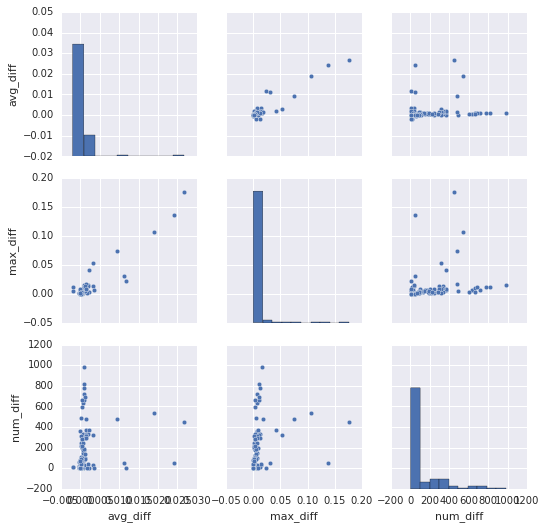

In [21]:
sns.pairplot(result)

The Avergage Difference, Max Difference, and total Number Different seem small for most metapaths, however there are a few with some larger values.

Also, there seems to be some correlation between the Max Difference and the Average Difference, which isn't too surprising, but not much in the way of correlation between the Number of differences and the other variables

## Looking at some of the larger differences

In [22]:
def plot_difference(old_dwpc, new_dwpc):
    diff = new_dwpc - old_dwpc
    
    dwpc_nonzero = (old_dwpc != 0).sum()
    mat_nonzero = (new_dwpc != 0).sum()
    became_nonzero = ((old_dwpc == 0) & (new_dwpc != 0)).sum()
    
    num_different = (abs(diff) > 0.0001).sum()
    sns.distplot(diff[abs(diff) > .0001], kde=False, rug=True)
    
    feature = old_dwpc.name
    
    text = """
    Non-Zero DWPC values (no-replacement): {}
    Zero DWPC values that became Non-Zero: {}
    Total number of values that changed: {}""".format(dwpc_nonzero, became_nonzero, num_different)
    
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    
    x_mid = (xlim[1] + xlim[0]) / 2
    y_mid = (ylim[1] + ylim[0]) / 2
    
    plt.text(2*x_mid/3, 3*y_mid/2, text)
    plt.xlabel('Difference in DWPC calculation (Neo4j - Matrix)')
    plt.ylabel('Frequency')
    plt.title('Distribution of differences of calcualtion of feature {}'.format(feature))
    
def compare_metapath(mp):
    if is_same(m[mp], m[mp+'_mat']):
        print('The Neo4j and Matrix calculations are the same for metapath {}'.format(mp))
    else:
        plot_difference(m[mp], m[mp+'_mat'])

### Max Differences

Look at the metapaths with the largest maximum difference between neo4j and maxtrix calculations

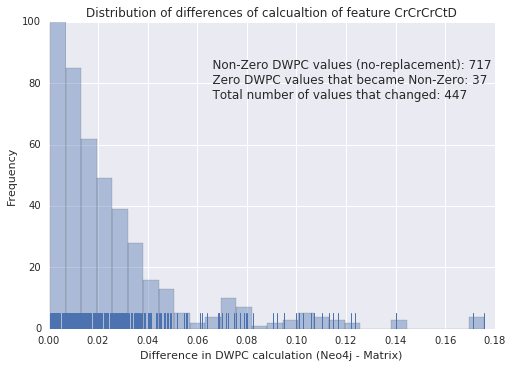

In [23]:
compare_metapath(result['max_diff'].sort_values(ascending=False).index[0])

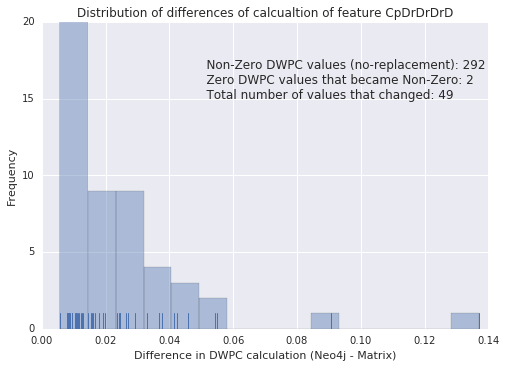

In [24]:
compare_metapath(result['max_diff'].sort_values(ascending=False).index[1])

### Avg Diff

Since avg difference is correlated with max difference, looking at the largest wouldn't show much difference.  So lets look at some of the smallest

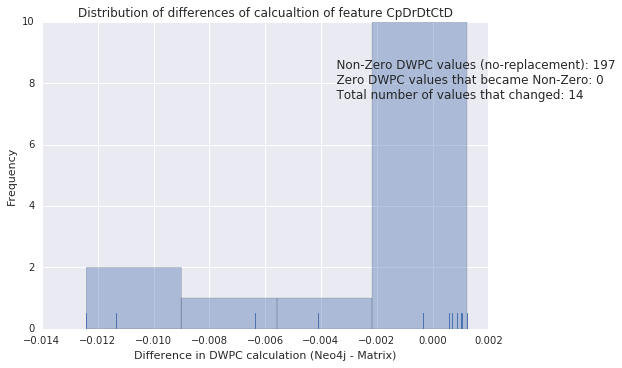

In [25]:
compare_metapath(result['avg_diff'].sort_values(ascending=True).index[0])

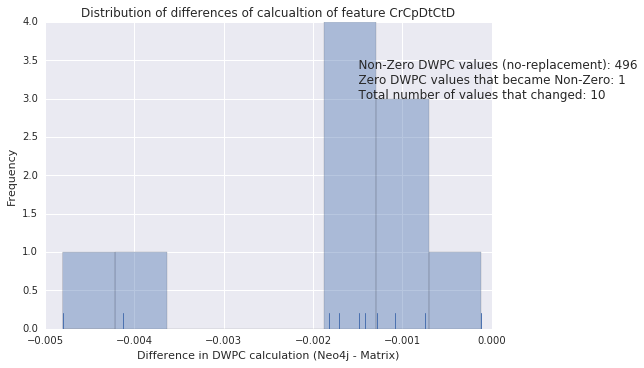

In [26]:
compare_metapath(result['avg_diff'].sort_values(ascending=True).index[1])

## Num Different

Some have a lot of differences from the Neo4j feature extraction, but the average difference is small.  Lets examine a couple

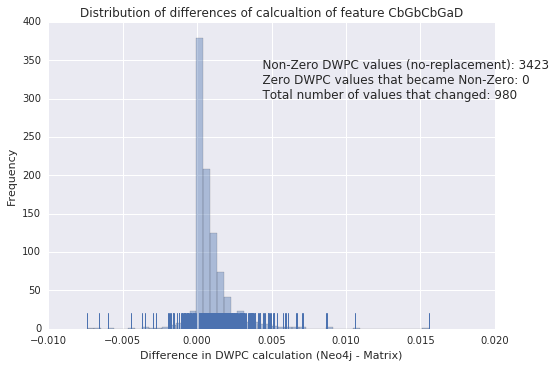

In [27]:
compare_metapath(result['num_diff'].sort_values(ascending=False).index[0])

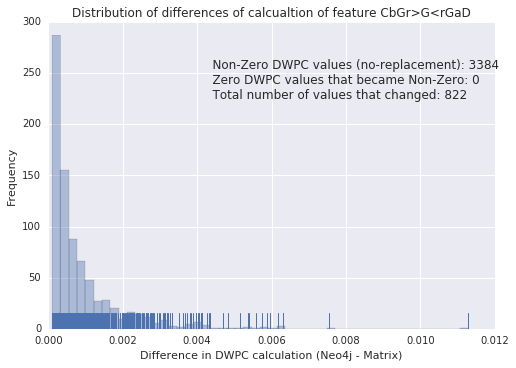

In [28]:
compare_metapath(result['num_diff'].sort_values(ascending=False).index[1])